# LSTM Evaluation

After running the baseline and multivariate LSTM in Google Colab, I saved the fitted values in separate csv's. 

* [X] Read csv's

* [X] Write a function to calculate RMSE, MAE

* [X] Visualize the 5 models: training - true values, test - true values, and fitted values on test

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'NVDA']

### Reading data

In [3]:
stocks = pd.read_csv('stocks_filtered.csv')
stocks['date'] = pd.to_datetime(stocks['date'])
stocks = stocks.set_index('date')

In [44]:
stocks_pivot = pd.pivot(stocks, columns='ticker', values='adj_close')
result = stocks_pivot.loc[stocks_pivot.index >= pd.to_datetime('2022-01-01')]

In [45]:
for ticker in tickers:
    
    df_univariate = pd.read_csv('LSTM fit/' + ticker + 'baseline.csv')
    df_univariate['date'] = pd.to_datetime(df_univariate['index'])
    df_univariate = df_univariate.set_index('date')
    
    result = result.join(df_univariate['y_fitted']).rename(
        columns={'y_fitted': ticker + ': univariate'})

    df_multivariate =  pd.read_csv('LSTM fit/' + ticker + '_multivariateLSTM.csv')
    df_multivariate['date'] = pd.to_datetime(df_multivariate['index'])
    df_multivariate = df_multivariate.set_index('date')
    
    result = result.join(df_multivariate['y_fitted']).rename(
        columns={'y_fitted': ticker + ': multivariate'})
    
    print("\n" + ticker)
    print(result.isna().sum())


AAPL
AAPL                  0
AMZN                  0
GOOG                  0
MSFT                  0
NVDA                  0
AAPL: univariate      0
AAPL: multivariate    0
dtype: int64

AMZN
AAPL                  0
AMZN                  0
GOOG                  0
MSFT                  0
NVDA                  0
AAPL: univariate      0
AAPL: multivariate    0
AMZN: univariate      0
AMZN: multivariate    0
dtype: int64

GOOG
AAPL                  0
AMZN                  0
GOOG                  0
MSFT                  0
NVDA                  0
AAPL: univariate      0
AAPL: multivariate    0
AMZN: univariate      0
AMZN: multivariate    0
GOOG: univariate      0
GOOG: multivariate    0
dtype: int64

MSFT
AAPL                  0
AMZN                  0
GOOG                  0
MSFT                  0
NVDA                  0
AAPL: univariate      0
AAPL: multivariate    0
AMZN: univariate      0
AMZN: multivariate    0
GOOG: univariate      0
GOOG: multivariate    0
MSFT: univariate      0
M

In [47]:
result.head()

,AAPL,AMZN,GOOG,MSFT,NVDA,AAPL: univariate,AAPL: multivariate,AMZN: univariate,AMZN: multivariate,GOOG: univariate,GOOG: multivariate,MSFT: univariate,MSFT: multivariate,NVDA: univariate,NVDA: multivariate
date,,,,,,,,,,,,,,,
2022-01-03,180.433547,169.995071,145.0745,330.054818,300.852958,179.788544,175.316986,165.811646,166.030670,143.597412,144.981964,334.316406,331.153259,290.935150,288.899567
2022-01-04,178.143555,167.119496,144.4165,324.395327,292.552808,182.681519,174.422501,165.254333,164.987885,142.439590,145.805481,336.771881,329.828674,289.237823,287.306702
2022-01-05,173.404956,163.962101,137.6535,311.942474,275.712793,185.393402,173.703522,164.733261,163.487030,141.336517,146.306213,339.038086,328.676727,288.371216,285.863953
2022-01-06,170.510247,162.861751,137.5510,309.477539,281.445989,187.897675,172.704529,164.264053,162.039215,140.388443,146.392410,341.230530,327.975555,287.542511,284.031036
2022-01-07,170.678775,162.163433,137.0045,309.635295,272.147025,190.298431,171.982803,163.844833,161.062195,139.568985,146.797592,343.384125,328.105591,286.479858,287.094299


### Evaluation

In [52]:
RMSE_uni = []
MAE_uni = []

RMSE_multi = []
MAE_multi = []

for ticker in tickers:
    
    print('\n' + ticker)
    
    truth = result[ticker]
    uni = result[ticker + ': univariate']
    multi = result[ticker + ': multivariate']
    
    RMSE_uni.append(np.sqrt(np.mean((truth - uni)**2)))
    MAE_uni.append(np.mean(abs(truth - uni)))

    RMSE_multi.append(np.sqrt(np.mean((truth - multi)**2)))
    MAE_multi.append(np.mean(abs(truth - multi)))

evaluation = pd.DataFrame({'ticker': tickers,
                           'RMSE_uni': RMSE_uni,
                           'MAE_uni': MAE_uni,
                           'RMSE_multi': RMSE_multi,
                           'MAE_multi': MAE_multi})

evaluation


AAPL

AMZN

GOOG

MSFT

NVDA


,ticker,RMSE_uni,MAE_uni,RMSE_multi,MAE_multi
0,AAPL,756.843865,604.088896,23.195569,17.456948
1,AMZN,40.994903,35.792095,19.582591,15.469903
2,GOOG,39.575192,33.930352,47.757323,44.297828
3,MSFT,5776.331440,3632.363610,68.343328,46.863243
4,NVDA,122.259199,76.814878,84.958864,54.677530


### Visualize!

In [117]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

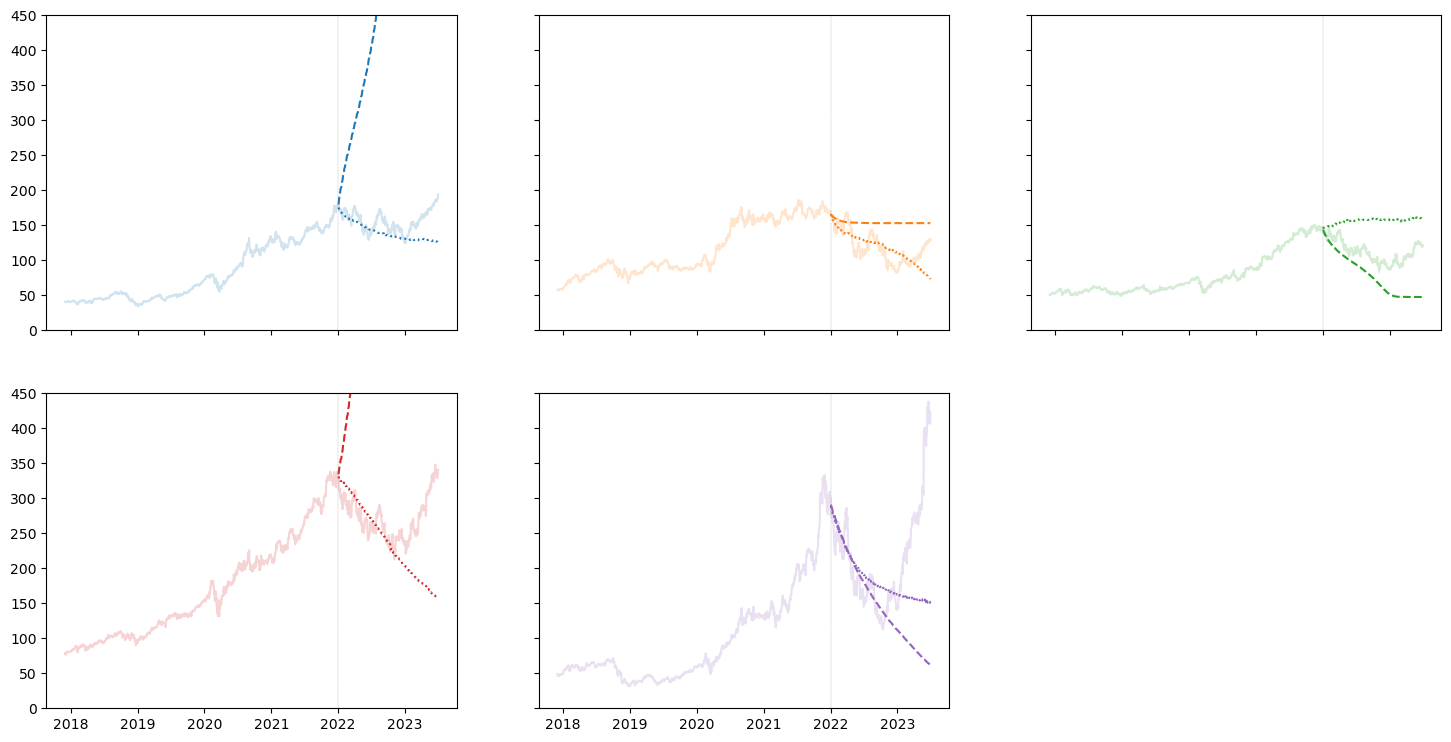

In [110]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9), sharex=True, sharey=True)

for ticker,ij,k in zip(tickers, 
                       itertools.product(range(2), range(3)),
                       range(5)):
    
    color_code = "C" + str(k) #k is just for color

    ax[ij].plot(result.index, result[ticker + ': univariate'],
               ls="--", color=color_code, label='univariate')
    ax[ij].plot(result.index, result[ticker + ': multivariate'], 
               ls="dotted", color=color_code, label='multivariate')
    ax[ij].plot(stocks_pivot.index, stocks_pivot[ticker], 
               label="Truth", color=color_code, alpha=0.2)
    
    ax[ij].axvline(x=pd.to_datetime('2022-01-01'), 
                   color='gray', lw=0.2, ls="--")
    
ax[ij].set_ylim(0, 450)

fig.delaxes(ax[1][2])

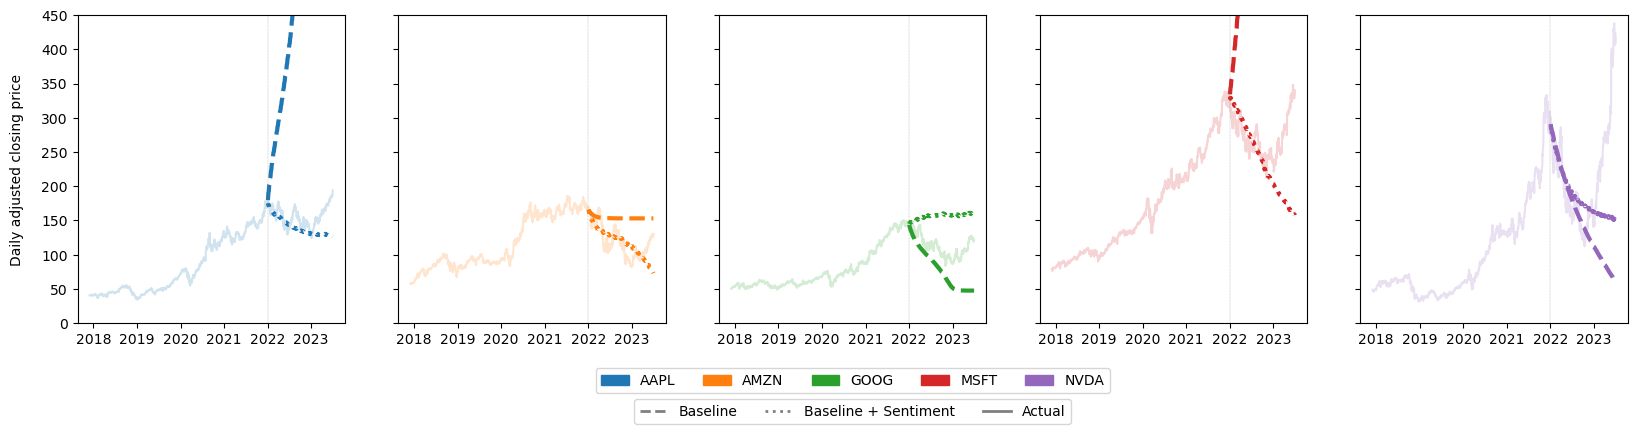

In [141]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

for ticker,k in zip(tickers, range(5)):
    
    color_code = "C" + str(k) 

    ax[k].plot(result.index, result[ticker + ': univariate'],
               ls="--", lw=3, color=color_code, label='univariate')
    ax[k].plot(result.index, result[ticker + ': multivariate'], 
               ls="dotted", lw=3, color=color_code, label='multivariate')
    ax[k].plot(stocks_pivot.index, stocks_pivot[ticker], 
              label="Truth", color=color_code, alpha=0.2)
    
    ax[k].axvline(x=pd.to_datetime('2022-01-01'), 
                   color='gray', lw=0.2, ls="--")
    
ax[k].set_ylim(0, 450)

linestyles = ['--', 'dotted', 'solid']

patches = [mpatches.Patch(color="C" + str(k), 
                          label=ticker) for (ticker, k) in zip(tickers,range(5))]

lines = [Line2D([0], [0], color='gray', 
                linewidth=2, linestyle=l) for l in linestyles]
llabels = ['Baseline', 'Baseline + Sentiment', 'Actual']

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

leg1 = plt.legend(patches, tickers, loc='lower center',
           bbox_to_anchor=(0.5, -0.25), ncol=5)
fig.add_artist(leg1)

plt.legend(lines, llabels, loc='lower center',
           bbox_to_anchor=(0.5, -0.35), ncol=3)

plt.ylabel('Daily adjusted closing price\n')

plt.savefig('fitted.png', bbox_inches="tight")


In [85]:
for i in itertools.product(range(3), range(2)):
    print(i)

(0, 0)
(0, 1)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
